# (27) Marija

**Motivation**: Create a notebook for Marija to generate results. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
cfg = Config(512)

In [3]:
cfg.all_dirs

{
    'base_dir': '/home/hadi/Documents/Ca-fMRI',
    'bold_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/bold',
    'ca_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/ca2',
    'download_dir': '/mnt/storage/hadi/Ca-fMRI',
    'log_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/log',
    'main_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3',
    'masks_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/masks',
    'parcel_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation',
    'processed_dir': '/home/hadi/Documents/Ca-fMRI/processed',
    'raw_dir': '/mnt/storage/hadi/Ca-fMRI/raw',
    'results_dir': '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results',
    'stim_dir': '/home/hadi/Documents/Ca-fMRI/stim',
    'svinet_dir': '/home/hadi/Documents/workspaces/svinet',
    'tx_dir': '/home/hadi/Documents/Ca-fMRI/processed/transforms',
    'warped_dir': '/home/hadi/Documents/Ca-fMRI/processed/warped'
}

In [2]:
mice = Mice(512)
mice.setup_preproc_data(desc={'ca2': 'preproc'})

In [3]:
props = {
    'mice': mice,
    'mode': 'ca2',
    'task': 'rest',
    'metric': 'pearson',
    'percentiles': np.linspace(30, 5, 6).astype(int),
    'prep_data': True,
    'binarize': False,
    'verbose': False,
}
bands = [None, (0.01, 0.5)]

In [4]:
pbar1 = tqdm(
    bands,
    leave=True,
    total=len(bands),
)
for b in pbar1:
    kwargs = {
        'task': props['task'],
        'runs_only': True,
        'exclude': True,
    }
    mice.setup_func_data(**kwargs)
    mice.set_band(band={'ca2': b})
    proc, *_ = mice.get_data_containers('ca2')
    pbar2 = tqdm(
        proc.items(),
        leave=False,
    )
    for key, func in pbar2:
        msg = f"running net (task-{props['task']}, "
        msg += f"b-{str(b).replace(' ', '')})"
        msg += f": {key}"
        pbar1.set_description(msg)
        # net = Network(key=key, **props).fit_network(
        #     force=True, full=False, save=True)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

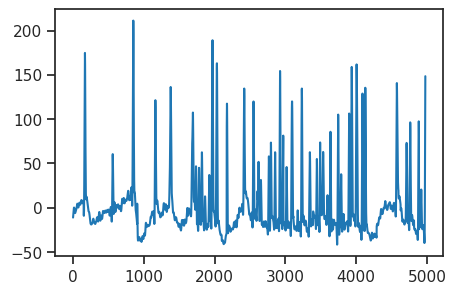

In [5]:
plt.plot(bn.nanmean(net.data, 0));

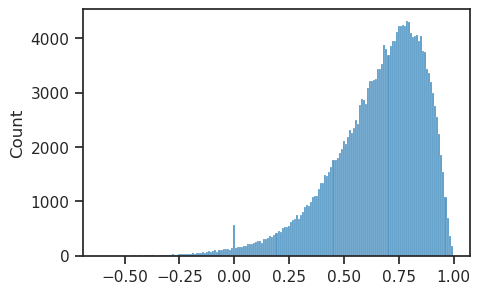

In [6]:
sns.histplot(net.adj[np.isfinite(net.adj)]);

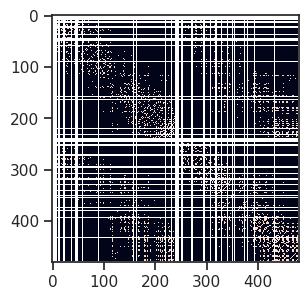

In [11]:
plt.imshow(net.adjacencies[5]);